In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv('final_merge.csv')

In [5]:
df

,Content ID,Reaction Type,Datetime,Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,Technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,Technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,Technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,Technology,negative,12


In [30]:
df['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [6]:
df.dtypes

Content ID       object
Reaction Type    object
Datetime         object
Type             object
Category         object
Sentiment        object
Score             int64
dtype: object

In [8]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [9]:
df.set_index('Datetime', inplace=True)

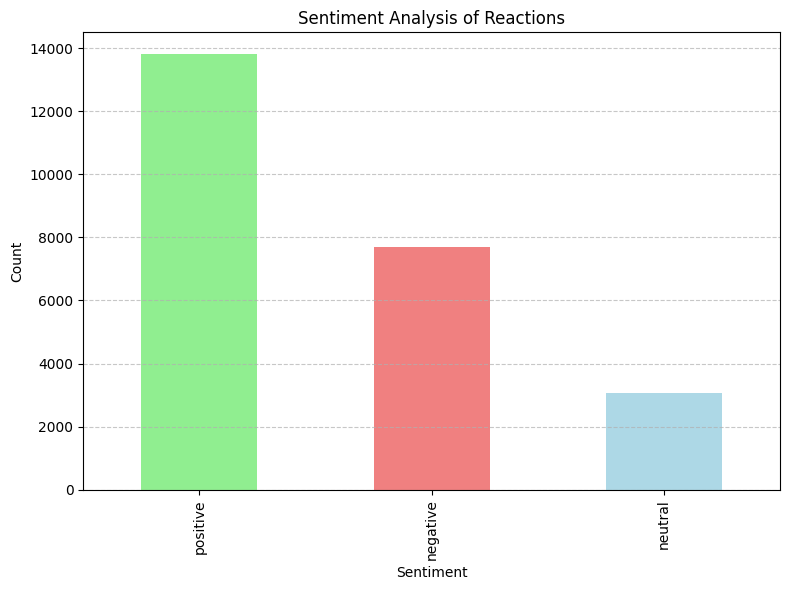

In [22]:
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Analysis of Reactions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

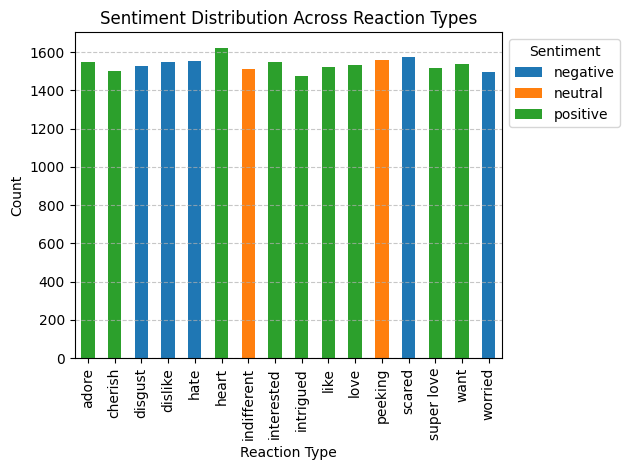

In [24]:
plt.figure(figsize=(10, 6))
df.groupby('Reaction Type')['Sentiment'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Reaction Types')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

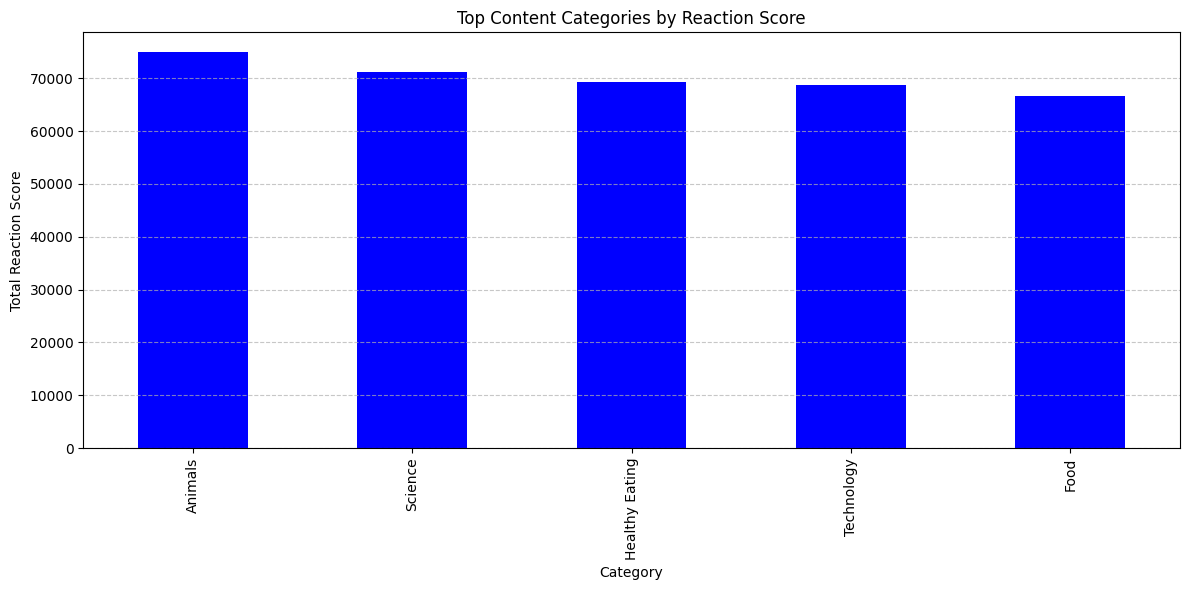

In [27]:
plt.figure(figsize=(12, 6))
top_categories = df.groupby('Category')['Score'].sum().nlargest(5)
top_categories.plot(kind='bar', color='blue')
plt.title('Top Content Categories by Reaction Score')
plt.xlabel('Category')
plt.ylabel('Total Reaction Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

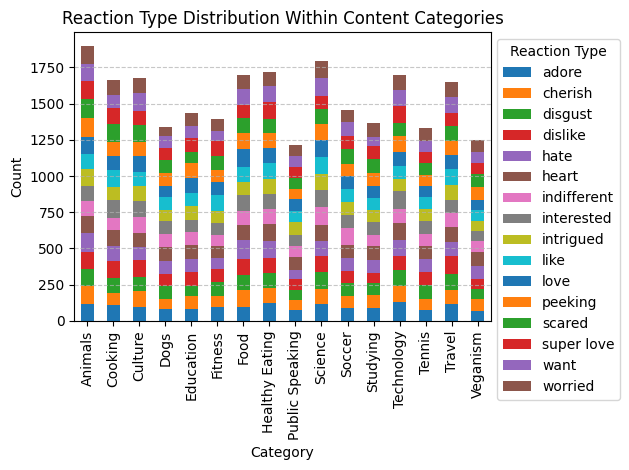

In [29]:
plt.figure(figsize=(12, 8))
reaction_type_distribution = df.groupby(['Category', 'Reaction Type']).size().unstack()
reaction_type_distribution.plot(kind='bar', stacked=True)
plt.title('Reaction Type Distribution Within Content Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Reaction Type', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()